# DR2-93: Implementing CIE198-SP2 using Monte Carlo Simulations

## MCS with Scalar values
## Demonstration based on standard functions and the class MCVar

In [1]:
from empir19nrm02.tools import draw_values_gum, plotHistScales, sumMC
from empir19nrm02.tools.help import strd, label_font_size, save_fig

out_dir = 'DR2-93'

## Define the number of Trials

In [2]:
Number_of_Trials = 10000

## Define some basic parameters for all simulations

In [3]:
mean_x0, std_x0, distribution_x0 = 0, 1, 'normal'
distribution_x0_2 = 'uniform'
mean_x1, std_x1, distribution_x1 = 3, 0.25, 'triangle'
mean_x2, std_x2, distribution_x2  = 1.5, 0.25, 'normal'


## Generate some random numbers  from a normal distribution and plot the histogram

Value= [0.0052829428497630036, 0.9865103421317408] Inteval(95%)= 3.8809033544839924 U= 1.9404516772419962


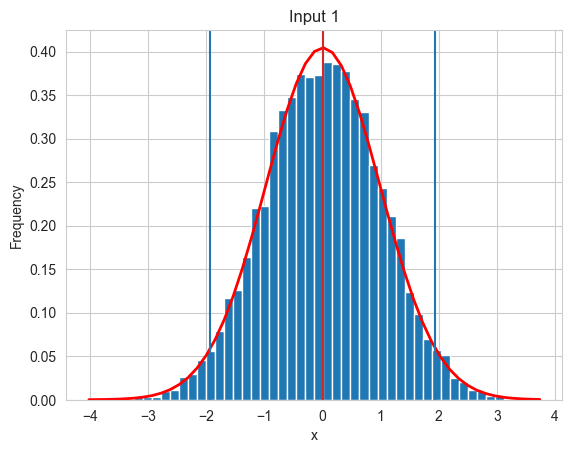

In [4]:
input1 = draw_values_gum(mean=mean_x0, stddev=std_x0, draws=Number_of_Trials, distribution=distribution_x0)
plotHistScales(input1, title='Input 1', xLabel='x', yLabel='Frequency', bins=50, add_distribution=True)
save_fig(out_dir, 'Scalar_' + 'Normal')


## Generate some random numbers  from a uniform distribution and plot the histogram

Value= [0.02111187082201491, 1.0011098028068555] Inteval(95%)= 3.2949274520673164 U= 1.6474637260336582


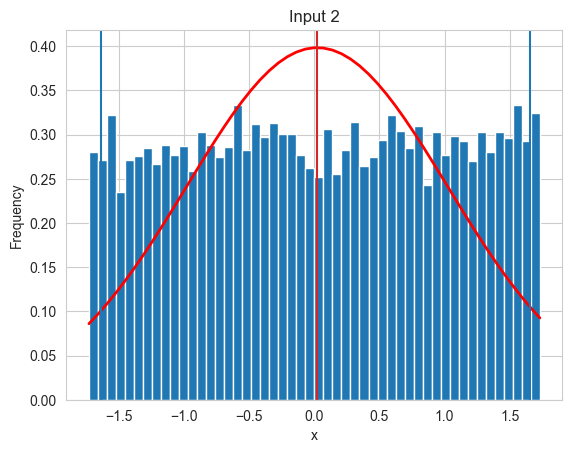

In [5]:
input2 = draw_values_gum(mean=mean_x0, stddev=std_x0, draws=Number_of_Trials, distribution=distribution_x0_2)
plotHistScales(input2, title='Input 2', xLabel='x', yLabel='Frequency', bins=50, add_distribution=True)
save_fig(out_dir, 'Scalar_' + 'Triangle')

# Evaluate the statistical data of the random numbers using the function sumMC

In [6]:
[values1, interval1] = sumMC(input1, Coverage=0.95)
print('values1: ', values1)
print('interval1: ', interval1)


values1:  [0.0052829428497630036, 0.9865103421317408]
interval1:  [-1.938516600944996, 1.9423867535389963]


## Generate the same random numbers with the class MCVar and plot the histogram

Value= [-0.010682917646812529, 0.9924701784113575] Inteval(95%)= 3.8434023053850876 U= 1.9217011526925438
Value= [0.0030981253871787883, 1.0024978465921803] Inteval(95%)= 3.2906032361695194 U= 1.6453016180847597


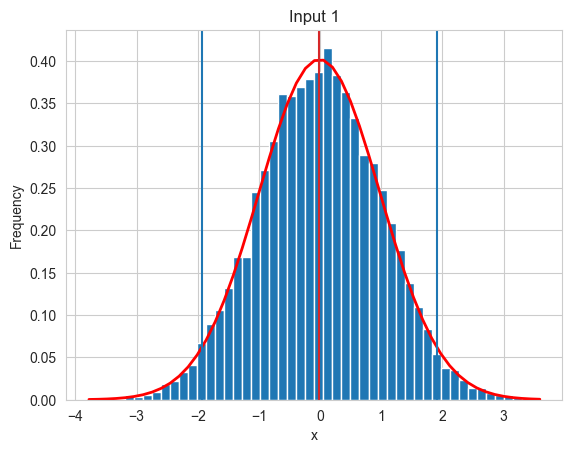

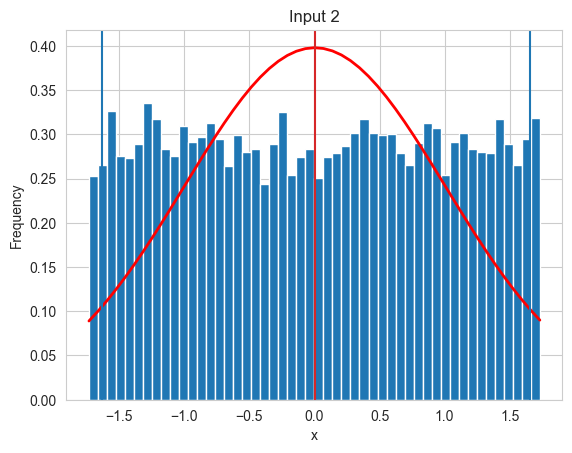

In [7]:
from empir19nrm02.MC import MCVar, NameUnit, DistributionParam, MCSimulation

input1_MC = MCVar(name=NameUnit('Input1_MC', 'Unit1_MC'), distribution=DistributionParam(mean=mean_x0,stddev=std_x0, distribution=distribution_x0))
input2_MC = MCVar(name=NameUnit('Input2_MC', 'Unit2_MC'), distribution=DistributionParam(mean=mean_x0,stddev=std_x0, distribution=distribution_x0_2))

input1_MC.generate_numbers(Number_of_Trials)
input2_MC.generate_numbers(Number_of_Trials)
plotHistScales(input1_MC.val, title='Input 1', xLabel='x', yLabel='Frequency', bins=50, add_distribution=True)
plotHistScales(input2_MC.val, title='Input 2', xLabel='x', yLabel='Frequency', bins=50, add_distribution=True)

sumMC = input1_MC.val + input2_MC.val

## Generate an exampe for the joint distribution of two random variables

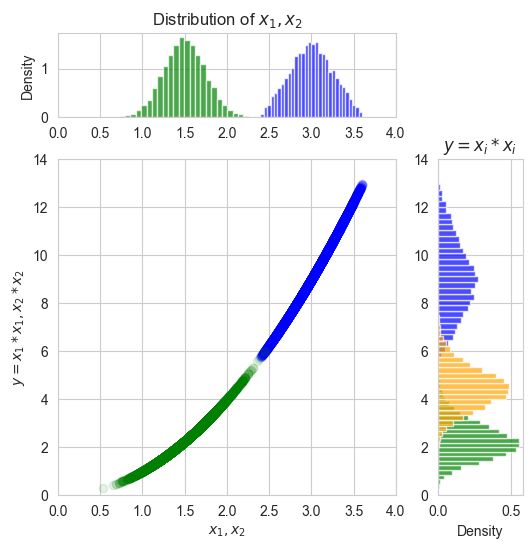

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

# Define the new parameters for x1 and x2
x1 = draw_values_gum(mean=mean_x1, stddev=std_x1, draws=Number_of_Trials, distribution=distribution_x1)
x2 = draw_values_gum(mean=mean_x2, stddev=std_x2, draws=Number_of_Trials, distribution=distribution_x2)

# Generate a range for x values
x_range = np.linspace(-1, 3, 400)
y = x_range * x_range

# Scatter plot of the random data
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4))
ax1 = fig.add_subplot(gs[1, 0])
ax1.scatter(x1,  x1*x1, alpha=0.1, color = 'blue')
ax1.set_xlabel('$x_1, x_2$')
ax1.set_xlim([-0,4])
ax1.set_ylim([-0,14])
ax1.set_ylabel('$y=x_1*x_1, x_2*x_2$')

# Plot the marginal distributions as histograms
ax2 = fig.add_subplot(gs[0, 0], sharex=ax1)
ax2.hist(x1, bins=30, density=True, alpha=0.7, color='blue', orientation='vertical')
ax2.set_ylabel('Density')
ax2.set_title('Distribution of $x_1, x_2$')

ax3 = fig.add_subplot(gs[1, 1], sharey=ax1)
ax3.hist(x1*x1, bins=30, density=True, alpha=0.7, color='blue', orientation='horizontal')
ax3.set_xlabel('Density')
ax3.set_title('$y=x_i*x_i$')

save_fig(out_dir, 'Scalar_' + 'Joint_x1x1', show=False)

ax1.scatter(x2,  x2*x2, alpha=0.1, color = 'green')
ax2.hist(x2, bins=30, density=True, alpha=0.7, color='green', orientation='vertical')
ax3.hist(x2*x2, bins=30, density=True, alpha=0.7, color='green', orientation='horizontal')
save_fig(out_dir, 'Scalar_' + 'Joint_x2x2', show=False)


ax3.hist(x1*x2, bins=30, density=True, alpha=0.7, color='orange', orientation='horizontal')
save_fig(out_dir, 'Scalar_' + 'Joint_xx', show=True)


## Generate an exampe for an integrated MCS

In [9]:
# define the input parameter
input12_MC = MCVar(name=NameUnit('x_1', 'Unit1_MC'), distribution=DistributionParam(mean=mean_x1,stddev=std_x1, distribution=distribution_x1))
input22_MC = MCVar(name=NameUnit('x_2', 'Unit2_MC'), distribution=DistributionParam(mean=mean_x2,stddev=std_x2, distribution=distribution_x2))

# define the output parameter
output1_MC = MCVar(name=NameUnit('x_1*x_1', 'Unit3_MC'))
output2_MC = MCVar(name=NameUnit('x_2*x_2', 'Unit4_MC'))
output3_MC = MCVar(name=NameUnit('x_1*x_2', 'Unit4_MC'))

# make the MCS simple
def runSimpleMC( input, output, NumberTrials, model_function):
    # genrate an instance of the MCS class
    sim = MCSimulation(trials=NumberTrials)
    # set the input and output variables
    sim.set_input_var(input)
    sim.set_output_var(output)
    # generate the random numbers
    sim.generate()
    # calculate the output over the model_function
    sim.calculate_model( model_function)
    # return the output variable and the result database
    return sim.output_var, sim.get_result_db()

# define a simple model function
def simplest_model(i, x1, x2):
    return x1*x1, x2*x2, x1*x2

# run the simulation
input = [input12_MC, input22_MC]
output = [output1_MC, output2_MC, output3_MC]

mcResult, res_data = runSimpleMC(input, output, Number_of_Trials, simplest_model)

res_data


,Input,Unit,Mean,StdDev,Distr,x_1*x_1,u(x_1*x_1),x_2*x_2,u(x_2*x_2),x_1*x_2,u(x_1*x_2)
0,x_1,Unit1_MC,3.00000000,0.25000000,triangle,9.03953660,1.49590660,2.25000000,0.00000000,4.49435283,0.37383150
0,x_2,Unit2_MC,1.50000000,0.25000000,normal,9.00000000,0.00000000,2.31258211,0.76036574,4.49967309,0.75245003
0,All,,0.00000000,0.00000000,,9.03953660,1.49590660,2.31258211,0.76036574,4.49410120,0.84168181


## Test Correlation

In [10]:
import math
# Show correlation of two random numbers with marginal distributions

def showCorrelationMarginal(x1, x2):
    xMin, xMax = min(x1), max(x1)
    # xMin abrunden auf 0.1
    xMin = math.floor(xMin*10)/10
    # xMax aufrunden auf 0.1
    xMax = math.ceil(xMax*10)/10
    xDelta = xMax - xMin
    xMean = (xMax+xMin)/2

    print(xMin, xMax, xDelta)

    yMin, yMax = min(x2), max(x2)
    # xMin abrunden auf 0.1
    yMin = math.floor(yMin*10)/10
    # xMax aufrunden auf 0.1
    yMax = math.ceil(yMax*10)/10
    yDelta = yMax - yMin
    yMean = (yMax+yMin)/2
    print(yMin, yMax, yDelta)

    useDelta = max(xDelta, yDelta)
    useDelta2 = useDelta/2
    xMin, xMax = xMean - useDelta2, xMean + useDelta2
    yMin, yMax = yMean - useDelta2, yMean + useDelta2

    print(xMin, xMax, yMin, yMax)
    fig = plt.figure(figsize=(6, 6))
    # Scatter plot of the random data
    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4))
    ax1 = fig.add_subplot(gs[1, 0])
    ax1.scatter(x1, x2, alpha=0.5)
    ax1.set_xlabel('$x_1$')
    ax1.set_xlim([xMin,xMax])
    ax1.set_ylim([yMin,yMax])
    ax1.set_ylabel('$x_2$')

    # Plot the marginal distributions as histograms
    ax2 = fig.add_subplot(gs[0, 0], sharex=ax1)
    ax2.hist(x1, bins=30, density=True, alpha=0.7, color='blue', orientation='vertical')
    ax2.set_ylabel('Density')
    ax2.set_title('Marg. $x_1$')

    ax3 = fig.add_subplot(gs[1, 1], sharey=ax1)
    ax3.hist(x2, bins=30, density=True, alpha=0.7, color='orange', orientation='horizontal')
    ax3.set_xlabel('Density')
    ax3.set_title('Marg. $x_2$')


2.3 3.7 1.4000000000000004
0.5 2.5 2.0
2.0 4.0 0.5 2.5


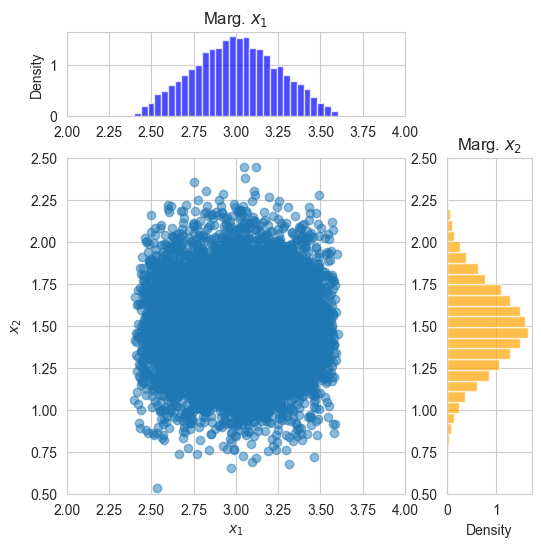

In [11]:
showCorrelationMarginal(x1, x2)

In [12]:
def generate_corr_numbers( vmean, vstd, corr,trials, distr = 'normal'):
    """
    Generate trials random vectors with a given mean, standard deviation and simple correlation
    distr: 'normal' or 'uniform'
    :param vmean:   mean vector
    :param vstd:    vector of standard deviations
    :param corr:    correlation between the random numbers inside the vector (simple case with one correlation only)
    :param trials:  number of trials
    :param distr:   'normal' or 'uniform'
    :return:        trials random vectors with a given mean, standard deviation and simple correlation
    """

    number = vmean.size
    if distr == 'normal':
        v1 = np.random.randn(number, trials)
    elif distr == 'uniform':
        v1 = np.random.uniform(-1*math.sqrt(3), math.sqrt(3), [number, trials])
    #print( 'stdDev:', np.std(v1, axis=1))
    corr_matrix = np.ones([number, number])*corr
    for i in range(number):
        corr_matrix[i,i]=1
    SD = np.ones(number)
    cov_matrix = np.outer(SD, SD)*corr_matrix
    cov_matrix_cholesky = np.linalg.cholesky(cov_matrix)
    # introduce the correlation
    v2 = np.dot(cov_matrix_cholesky, v1)
    # scale and shift the numbers
    v3=vstd[:, np.newaxis] * v2 + vmean[:, np.newaxis]
    return v3

2.0 4.0 2.0
2.0 4.0 2.0
2.0 4.0 2.0 4.0
[[1.0000e+00 4.9731e-01]
 [4.9731e-01 1.0000e+00]]


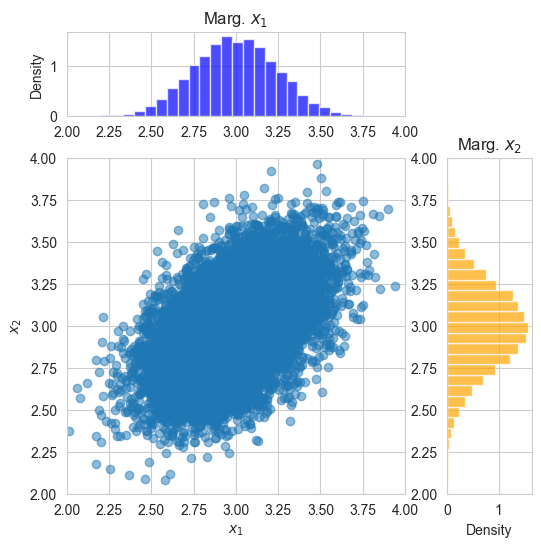

In [13]:
v3 = generate_corr_numbers(np.ones(2)*mean_x1, np.ones(2)*std_x1, 0.5, Number_of_Trials)
showCorrelationMarginal(v3[0], v3[1])
print( np.corrcoef(v3[0], v3[1]))

2.5 3.5 1.0
2.4 3.6 1.2000000000000002
2.4 3.6 2.4 3.6
[[1.0000e+00 3.0968e-01]
 [3.0968e-01 1.0000e+00]]


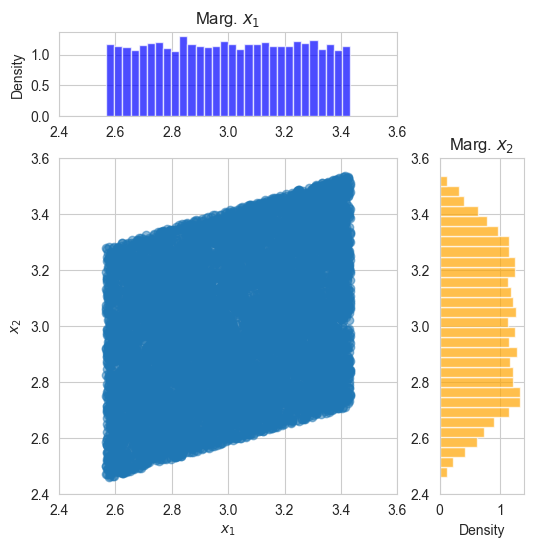

In [14]:
v3 = generate_corr_numbers(np.ones(2)*mean_x1, np.ones(2)*std_x1, 0.3, Number_of_Trials, distr='uniform')
showCorrelationMarginal(v3[0], v3[1])
print( np.corrcoef(v3[0], v3[1]))

2.3 3.7 1.4000000000000004
2.6 3.5 0.8999999999999999
2.3 3.7 2.3499999999999996 3.75
[[1.0000e+00 9.9984e-01]
 [9.9984e-01 1.0000e+00]]


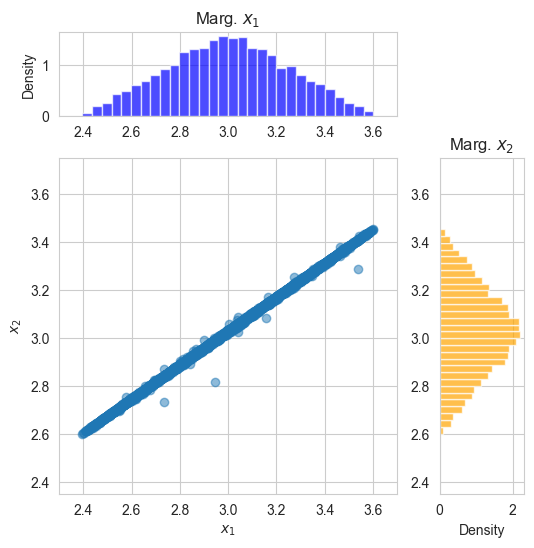

In [15]:

# we have a vector x1 with random numbers and need a second vector x2 with a given correlation
def generate_corr_numbers2( x1, corr, mean_new=None, stdDev_new=None):
    """
    Generate a second vector with a given correlation to the first vector
    :param x1:      first vector
    :param corr:    correlation between the random numbers inside the vector (simple case with one correlation only)
    :return:        second vector with a given correlation to the first vector
    """
    number = x1.size
    x1Mean = np.mean(x1)
    x1Std = np.std(x1)
    
    x1Norm = (x1 - x1Mean)/x1Std
    
    corr_matrix = np.ones([number, number])*corr
    for i in range(number):
        corr_matrix[i,i]=1
    SD = np.ones(number)
    cov_matrix = np.outer(SD, SD)*corr_matrix
    cov_matrix_cholesky = np.linalg.cholesky(cov_matrix)
    # introduce the correlation
    v2 = np.dot(cov_matrix_cholesky, x1Norm)
    # scale and shift the numbers
    if mean_new is None:
        mean_new = x1Mean
    if stdDev_new is None:
        stdDev_new = x1Std
    v3=v2*stdDev_new + mean_new
    return v3

x22 = generate_corr_numbers2(x1, 0.5)
showCorrelationMarginal(x1, x22)
print( np.corrcoef(x1, x22))
    